# ビジネスに活かすデータマイニングをPythonでやってみる


## 目的

- データ分析におけるtoolkitsの総合的理解
- 特に機械学習、統計で、R/Pythonをシーンに応じて使い分けられるようにすること
    - 大量データ（扱うデータ量の境目は？）
    - Deep NN（めぼしいライブラリはPython. Rと同じくらいwranglingなども使いこなせる必要）

## 2.4.4 Rでデータを操作する

> [R vs Python: データ解析を比較 POSTD](http://postd.cc/r-vs-python-head-to-head-data-analysis/)
> それぞれの処理コードの比較

#### A. Pythonでの統計の準備
    - 標準的なpythonの科学技術環境
        - numpy
        - scipy
        - matplotlib
    - pandas
    - statsmodels
    - seaborn
    - ただし、bayesian統計は扱わない。特化したものとしてPyMCがある。

> [Pythonでの統計](http://www.turbare.net/transl/scipy-lecture-notes/packages/statistics/index.html#post-hoc-hypothesis-testing-analysis-of-variance-anova)


#### B. Data Wrangling関数対応表

|手法1|手法2|R|Python|
|---|---|---|---|
|Input|CSV読み込み|X <- read.csv("filename")|X = pandas.read_csv("filename")|
||head|head(X)|X.head()|



#### C. 統計的、機械学習的手法の関数対応表

|手法1|手法2|R|Python|
|---|---|---|---|
|検定|T検定|t.test()|scipy.stats.ttest_ind(), ttest_rel()|
||カイ二乗検定|chisq.test()|scipy.stats.chi2_contingency()|
||Fisher検定|fisher.test()|scipy.stats.fisher_exact()|
||Wilcoxon検定|wilcox.test()|scipy.stats.wilcoxon()|
|回帰|重回帰分析|lm()|?|
||ロジスティック回帰|||
|分類|決定木|||
||階層型Clustering|hclust()|scipy.cluster.hierarchy|
||K-means Clustering|kmenas()|sklearn.cluster.KMeans()|
||EM|mclust:hc()|?|
||Random Forest|||
||主成分分析|princomp()|sklearn.decomposition.PCA()|
||因子分析|factanal()|sklearn.decomposition.FactorAnalysis()|
|時系列分析||forecast:xxx()|statsmodels.tsa.xxx()|


In [106]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp

# 検定
from scipy.stats import ttest_ind # T検定
from scipy.stats import chi2_contingency # カイ二乗検定
from scipy.stats import fisher_exact # Fisher検定
from scipy.stats import wilcoxon # Wilcoxon検定

# ML, 分類器
from scipy.cluster.hierarchy import linkage, dendrogram # 階層型クラスタリング
from sklearn.cluster import KMeans # K平均法
from sklearn import svm # SVM

# 分散分析

from sklearn.decomposition import PCA # 主成分分析
from sklearn.decomposition import FactorAnalysis # 因子分析

# NN, DNN
# NNは例えば from sklearn.neural_network import MLPClasifier # 分類器
# DNNはChainer, tensorflowなど

# 判別分析

# boosting, bagging

# 時系列分析
# from statsmodels.tsa import xxx

from sklearn import datasets # Rと同じirisなどのデータセットが使える
import pandas as pd

x = pd.read_csv("data/ch3_2_2.txt", delim_whitespace=True)
x_noheader = pd.read_csv("data/ch3_2_2.txt", header = None, delim_whitespace=True)
# read.table("data/ch3_2_2.txt", header = TRUE, sep = " ")
# x
x

,DB1,DB2
0,0.947729,2.465692
1,1.404682,2.132022
2,1.406439,2.599804
3,1.839667,2.366184
4,1.326534,1.804903
5,2.311490,2.449027
6,1.317801,3.106597
7,2.012065,2.105955
8,0.717747,1.629425
9,1.997013,1.954929


In [15]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
x

### 1. データ形式を変える

- `as.xxx()`という書式で、vectorやlist形式に変換できる

- データ形式の対応

|R|Python|
|---|---|
|array|list|
|lists|dictionary or list of objects|
|data.frame|dataframe|

> [pandas 0.17.1 documentation: Comparison with R/R libraries](http://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html#plyr)


In [14]:
#x1 <- as.vector(x)
#x1
#x1$DB1
dx = pd.Series(x)
dx

ValueError: cannot copy sequence with size 2 to array axis with dimension 15

#x2 <- as.list(x)
#x2
#x2$DB1

### 2. データ型を変える

In [10]:
x1 <- as.factor(x)
x2 <- as.numeric(x)
x1
x2

ERROR: Error in sort.list(y): 'x' must be atomic for 'sort.list'
Have you called 'sort' on a list?


ERROR: Error in eval(expr, envir, enclos): (list) object cannot be coerced to type 'double'


,DB1,DB2
1,0.9477293,2.465692
2,1.404682,2.132022
3,1.406439,2.599804
4,1.839667,2.366184
5,1.326534,1.804903
6,2.31149,2.449027
7,1.317801,3.106597
8,2.012065,2.105955
9,0.7177466,1.629425
10,1.997013,1.954929


$DB1
 [1] 0.9477293 1.4046824 1.4064391 1.8396669 1.3265343 2.3114898 1.3178015
 [8] 2.0120652 0.7177466 1.9970131 1.8620700 1.0178107 2.9497059 1.7246067
[15] 0.7908451

$DB2
 [1] 2.465692 2.132022 2.599804 2.366184 1.804903 2.449027 3.106597 2.105955
 [9] 1.629425 1.954929 2.464656 1.983886 2.406778 2.498565 2.452570

### 3. データ行列を操作する

> [Pandasでデータフレームを条件指定で参照する](http://qiita.com/wwacky/items/095bcac7cc450dc3232a)

> [Python pandasのデータ選択処理をちょっと詳しく](http://sinhrks.hatenablog.com/entry/2014/11/12/233216)

In [11]:
y[2,2]

ERROR: Error in eval(expr, envir, enclos): object 'y' not found


In [24]:
x.ix[[2,2]]

,DB1,DB2
2,1.406439,2.599804
2,1.406439,2.599804


In [25]:
x.ix[2,2]

IndexError: index out of bounds

In [20]:
x['DB1'] # Seriesの取り出し

0     0.947729
1     1.404682
2     1.406439
3     1.839667
4     1.326534
5     2.311490
6     1.317801
7     2.012065
8     0.717747
9     1.997013
10    1.862070
11    1.017811
12    2.949706
13    1.724607
14    0.790845
Name: DB1, dtype: float64

In [22]:
type(x['DB1'])

pandas.core.series.Series

In [21]:
x[['DB1']] # DataFrameの取り出し

,DB1
0,0.947729
1,1.404682
2,1.406439
3,1.839667
4,1.326534
5,2.311490
6,1.317801
7,2.012065
8,0.717747
9,1.997013


In [23]:
type(x[['DB1']])

pandas.core.frame.DataFrame

In [28]:
# スライスで参照する
x.ix[2:3,:]

,DB1,DB2
2,1.406439,2.599804
3,1.839667,2.366184


## 3. 仮説検定

### 3.2.1 t検定: 睡眠薬の効果を「どれくらい睡眠時間を延ばしたか」で比べる

In [12]:
t.test(extra ~ group, data = sleep, paired = T)


	Paired t-test

data:  extra by group
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


### 3.2.2 t検定: データベース基盤システムのパフォーマンスを比べる

- 箱ひげ図で可視化する
- t検定で、t < 0 かつ p < 0.05なので、**有意に**DB1がDB2よりもレイテンシが小さい、と結論づけられる
- 箱ひげ図からある程度は予想できる（箱同士が重なるか、重ならないか）

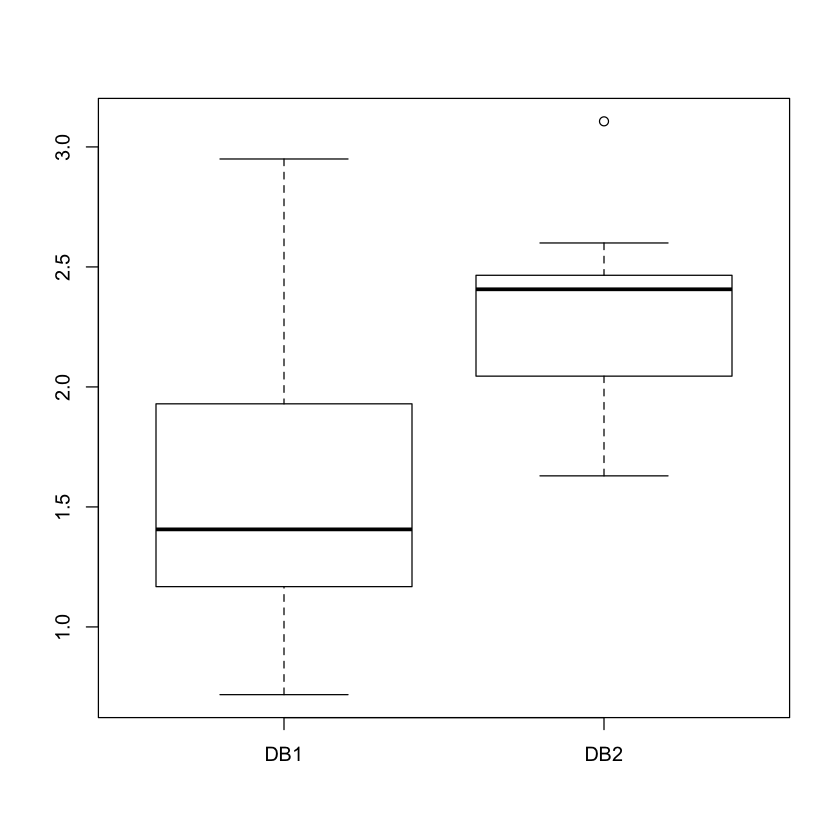

In [13]:
# R
d <- read.table("data/ch3_2_2.txt", header = TRUE, sep = " ")
boxplot(d)

/Users/tomo.masuda/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


{'boxes': [<matplotlib.lines.Line2D at 0x112ba7ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x112c19ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x111d87dd8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x112a3ef98>,
 'whiskers': [<matplotlib.lines.Line2D at 0x112ba77f0>,
  <matplotlib.lines.Line2D at 0x111f40550>]}

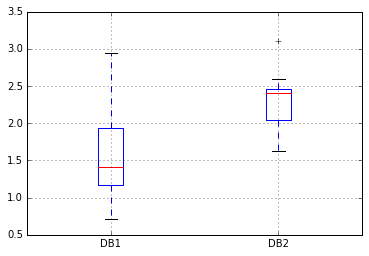

In [50]:
# Python
d = pd.read_csv("data/ch3_2_2.txt", delim_whitespace=True)
d.boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x1184a8e10>],
 'caps': [<matplotlib.lines.Line2D at 0x1184b5860>,
 'fliers': [<matplotlib.lines.Line2D at 0x1184bb9e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1184bb1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1184a8f98>,
  <matplotlib.lines.Line2D at 0x1184afef0>]}

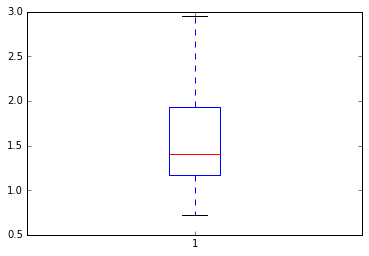

In [48]:
plt.boxplot(d['DB1'])

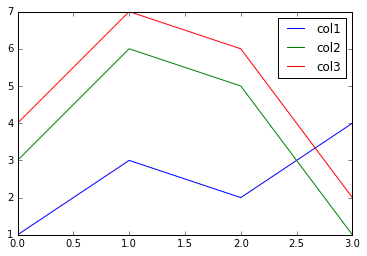

In [44]:
# plot例
plot_df = pd.DataFrame({
    'col1': [1, 3, 2, 4],
    'col2': [3, 6, 5, 1],
    'col3': [4, 7, 6, 2],
})
plot_df.plot()

In [15]:
# R
attach(d)
t.test(DB1, DB2)

The following objects are masked from d (pos = 3):

    DB1, DB2




	Welch Two Sample t-test

data:  DB1 and DB2
t = -3.9165, df = 22.914, p-value = 0.0006957
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0998402 -0.3394647
sample estimates:
mean of x mean of y 
 1.575080  2.294733 


In [57]:
# Python t検定 p-valueが違うのはなぜか
# scipy.statsをimport必要
ttest_ind(d['DB1'], d['DB2'])

Ttest_indResult(statistic=-3.9165450224294491, pvalue=0.00052535395037786212)

### 3.3 独立性の検定（カイ二乗検定）: 施策の効果があったかどうかを見る

- A/Bどちらが大きいかを知るにはt検定
- **分母の大きさに由来するばらつきを扱うケース**は独立性の決定を使って判定できる
    - カイ二乗検定 `chisq.test`
    - フィッシャーの正確確率検定 `fisher.test`
    - 伝統的には2x2分割表を扱う
        - 下記の様な施策（行） × 結果（列）
        
#### 3.3.1 予防接種は効果があったか
    
||病気にかからなかった|病気にかかった|
|---|---|---|
|予防接種あり|1625|5|
|予防接種なし|1022|11|



In [17]:
x <- matrix(c(1625,5,1022,11), ncol = 2) # ncolは列数
x
chisq.test(x)
fisher.test(x)

1625,1022
5,11



	Pearson's Chi-squared test with Yates' continuity correction

data:  x
X-squared = 4.8817, df = 1, p-value = 0.02714



	Fisher's Exact Test for Count Data

data:  x
p-value = 0.01885
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  1.115982 12.879160
sample estimates:
odds ratio 
  3.496373 


> 注意: 極端にサンプルサイズが違うケースではchisq.testは使えない。fisher.testを使うこと

In [18]:
x <- matrix(c(1625,5,5,1), ncol = 2) # 片方が1桁しかないケース
chisq.test(x)
fisher.test(x)

Warning message:
In chisq.test(x): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test with Yates' continuity correction

data:  x
X-squared = 10.46, df = 1, p-value = 0.00122



	Fisher's Exact Test for Count Data

data:  x
p-value = 0.02184
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
   1.14725 773.04245
sample estimates:
odds ratio 
  63.18993 


> Pythonで同様に試している人がいる
> [データサイエンスをPythonで試す(1_検定)](http://esu-ko.hatenablog.com/entry/2016/03/07/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%82%B9%E3%82%92Python%E3%81%A7%E8%A9%A6%E3%81%99(1%3A%E6%A4%9C%E5%AE%9A))

- 対応なし（２つの独立した母集団から標本を選ぶ場合）
    - `scipy.stats.ttest_ind()`

- 対応あり（１つの母集団から標本を選ぶ場合）
    - `scipy.stats.ttest_rel()`

> 対応あり、なしについて
> [t検定 - 平均値の比較 -](http://www.codereading.com/statistics/t-test.html)

In [71]:
# chi2が使えるパターン
x = np.array([[1625,5],[1022,11]])
x

# x <- matrix(c(1625,5,1022,11), ncol = 2) # ncolは列数
# x
# chisq.test(x)
# fisher.test(x)

array([[1625,    5],
       [1022,   11]])

In [72]:
chi2_contingency(x)

(4.8816620295410686,
 0.027143470897616286,
 1,
 array([[ 1620.20653398,     9.79346602],
        [ 1026.79346602,     6.20653398]]))

In [73]:
fisher_exact(x)

(3.4980430528375734, 0.018847549230055043)

In [74]:
# chi2が使えず、fisherを使うパターン
x2 = np.array([[1625,5],[5,1]])
x2

# x <- matrix(c(1625,5,5,1), ncol = 2) # 片方が1桁しかないケース
# chisq.test(x)
# fisher.test(x)

array([[1625,    5],
       [   5,    1]])

In [69]:
fisher_exact(x2)

(65.0, 0.02183720522404111)

In [70]:
chi2_contingency(x2)

(10.459696806219444,
 0.0012200730171329503,
 1,
 array([[  1.62402200e+03,   5.97799511e+00],
        [  5.97799511e+00,   2.20048900e-02]]))

#### 3.3.2 A／Bテスト

サイト導線A/Bで効果に違いはあったか

||コンバージョンした|コンバージョンしなかった|
|---|---|---|
|サイト導線A|25|117|
|サイト導線B|10|32|


In [19]:
ab1 <- matrix(c(25,117,10,32), ncol = 2, byrow = T)
ab1
chisq.test(ab1)

25,117
10,32



	Pearson's Chi-squared test with Yates' continuity correction

data:  ab1
X-squared = 0.45721, df = 1, p-value = 0.4989


In [75]:
# python
ab1 = np.array([[25,117],[10,32]])
chi2_contingency(ab1)

(0.45720973331198439,
 0.49893090327533818,
 1,
 array([[  27.01086957,  114.98913043],
        [   7.98913043,   34.01086957]]))

> **p = 0.5近いため**、統計的には効果があるとは言えない。

In [21]:
# 導線Bでのコンバージョンを6人増やす
ab2 <- matrix(c(25,117,16,32), ncol = 2, byrow = T)
ab2
chisq.test(ab2)

25,117
16,32



	Pearson's Chi-squared test with Yates' continuity correction

data:  ab2
X-squared = 4.3556, df = 1, p-value = 0.03689


In [76]:
# python
ab2 = np.array([[25,117],[16,32]])
chi2_contingency(ab1)

(0.45720973331198439,
 0.49893090327533818,
 1,
 array([[  27.01086957,  114.98913043],
        [   7.98913043,   34.01086957]]))

> **p < 0.05となり**、導線Bは有意に効果があり。十分なデータを蓄積することで有意差ありと結論づけられた。

## 3.4 順位和検定: 分布同士のずれを見る（ノンパラメトリック検定のひとつ）

- データがどの様に分布していてもお構いなしに使える仮説検定メソッド。**外れ値が多い**場合等に有効。
- t検定が使えない場面で伝統的に使われてきた
     - データのばらつきの分布が完全に不明
     - ２つのデータを比べたいのにお互いのばらつき分布が似ていない
     - 等
- ただし、t検定が使える場面では、t検定を使うべき

### 3.4.1 売上データで試す

In [24]:
r <- read.table("data/ch3_4_1.txt", header = TRUE, sep = " ")
r
attach(r)
wilcox.test(A, B)
t.test(A, B)

,A,B
1,146,157
2,162,117
3,152,116
4,149,137
5,157,123
6,132,143
7,154,122
8,156,133
9,150,113
10,143,129


The following objects are masked from r (pos = 3):

    A, B

Warning message:
In wilcox.test.default(A, B): cannot compute exact p-value with ties


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 841.5, p-value = 7.204e-09
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  A and B
t = 9.1439, df = 54.398, p-value = 1.377e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 18.37431 28.69236
sample estimates:
mean of x mean of y 
 153.7333  130.2000 


In [79]:
r = pd.read_csv("data/ch3_4_1.txt", delim_whitespace=True)
r.head()

# r <- read.table("data/ch3_4_1.txt", header = TRUE, sep = " ")
# r
# attach(r)
# wilcox.test(A, B)
# t.test(A, B)

,A,B
0,146,157
1,162,117
2,152,116
3,149,137
4,157,123


In [81]:
wilcoxon(r['A'],r['B']) # 結果が違う？

WilcoxonResult(statistic=11.0, pvalue=5.1896409350669929e-06)

In [82]:
ttest_ind(r['A'],r['B'])

Ttest_indResult(statistic=9.1438969513910457, pvalue=7.6823657980452976e-13)

> 外れ値を加えるとどうなるか。t検定はうまくいかないはず。

In [25]:
# R
r2 <- r
r2[1,1] <- 50
r2[1,2] <- 400
attach(r2)
wilcox.test(A, B)
t.test(A, B)

The following objects are masked from r (pos = 3):

    A, B

The following objects are masked from r (pos = 4):

    A, B

Warning message:
In wilcox.test.default(A, B): cannot compute exact p-value with ties


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 805, p-value = 1.566e-07
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  A and B
t = 1.2286, df = 38.583, p-value = 0.2267
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.914541 32.381208
sample estimates:
mean of x mean of y 
 150.5333  138.3000 


## 4. 重回帰分析

### 4.3 オゾン濃度と気象データの関連性を調べる

In [26]:
# R
data(airquality) # ニューヨークの1973年5-9月 オゾン濃度と各種気象データ
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41,190,7.4,67,5,1
2,36,118,8,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


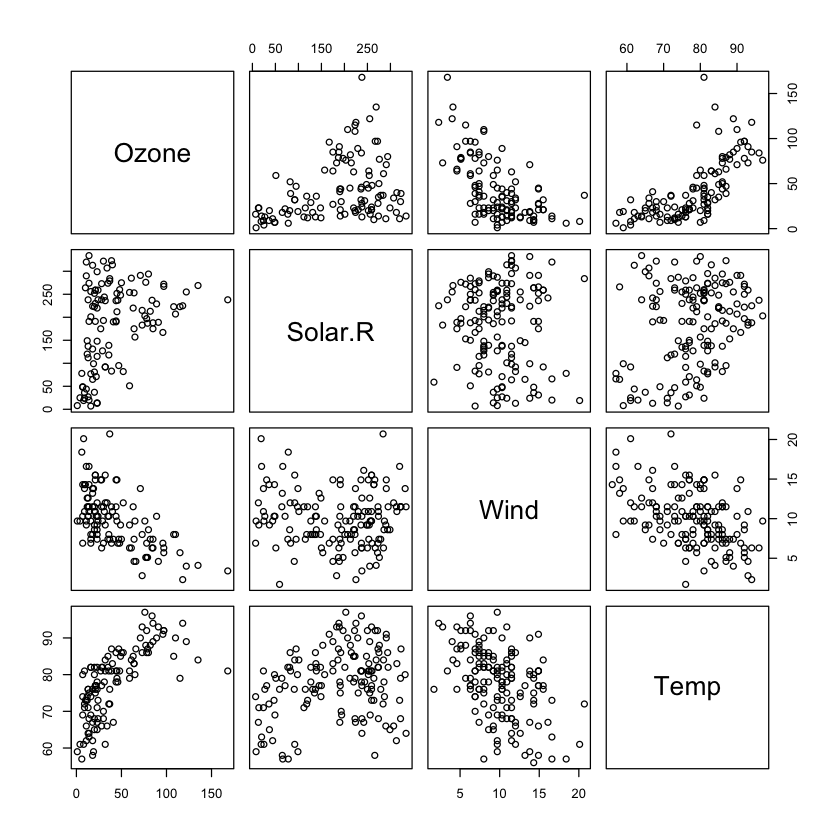

In [28]:
airq <- airquality[,1:4] # 1-4列目のみ抽出
plot(airq)

In [29]:
airq.lm <- lm(Ozone ~ ., airq) # Ozoneを目的変数として重回帰
summary(airq.lm)


Call:
lm(formula = Ozone ~ ., data = airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.485 -14.219  -3.551  10.097  95.619 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -64.34208   23.05472  -2.791  0.00623 ** 
Solar.R       0.05982    0.02319   2.580  0.01124 *  
Wind         -3.33359    0.65441  -5.094 1.52e-06 ***
Temp          1.65209    0.25353   6.516 2.42e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.18 on 107 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.5948 
F-statistic: 54.83 on 3 and 107 DF,  p-value: < 2.2e-16


> R squared = 0.6 近い

**偏回帰係数と相関係数の違い**に注意すること  ←あとで読み返す★

# 5. クラスタリング

## 5.3 ECサイトの顧客データでクラスタリング

### 5.3.1 階層的クラスタリング

> [Pythonで階層的クラスタリング](http://blog.unfindable.net/archives/6178)

In [30]:
# R
d <- read.table("data/ch5_3.txt", header = TRUE, sep = " ")
head(d)

,books,cloths,cosmetics,foods,liquors
1,43,0,3,4,10
2,25,5,5,3,11
3,19,0,2,3,8
4,31,3,3,4,5
5,46,9,2,5,7
6,28,3,7,4,0


In [83]:
# Python
ec = pd.read_csv("data/ch5_3.txt", delim_whitespace = True)
ec.head()

,books,cloths,cosmetics,foods,liquors
0,43,0,3,4,10
1,25,5,5,3,11
2,19,0,2,3,8
3,31,3,3,4,5
4,46,9,2,5,7


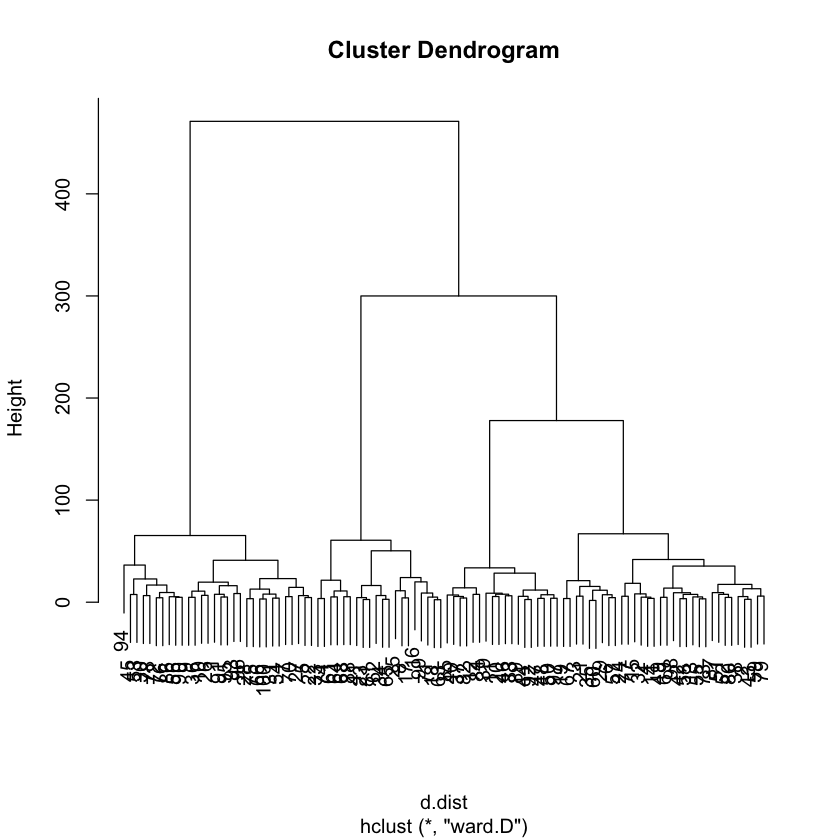

In [31]:
# R
d.dist <- dist(d) # 全データ点同士の距離を算出
d.hcl <- hclust(d.dist, "ward.D") # Ward法で階層的クラスタリングを実施
plot(d.hcl)

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

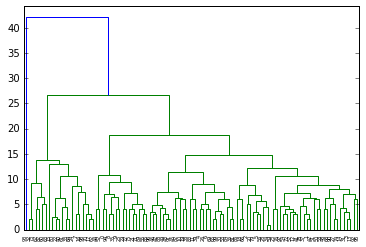

In [88]:
# Python　非類似度指標にクラスタ連結法を使う
ec_result = linkage(ec, metric = 'chebyshev', method = 'average')
dendrogram(ec_result)
# エラーあり

In [32]:
ClusterWard <- cutree(d.hcl, 3)
ClusterWard

[1] 1 2 2 2 1 2 1 3 1 1 2 2 2 2 2 3 3 3 2 2 2 1 3 2 3 1 1 1 2 1 1 2 3 3 2 1 2
 [38] 2 2 2 3 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 3 3 3 3 3 1 2 3 2 1 3 1 2 3
 [75] 1 1 2 1 2 2 3 2 2 2 2 1 2 3 2 1 1 2 1 1 1 1 2 2 3 1

### 5.3.2 k-means法

> [scikit-learnによる最も基本的なクラスタリング分析 - Qiita](http://qiita.com/ynakayama/items/1223b6844a1a044e2e3b)

In [34]:
#R
d.km <- kmeans(d, 3)
d.km
ClusterKmeans <- d.km$cluster

K-means clustering with 3 clusters of sizes 21, 46, 33

Cluster means:
      books   cloths cosmetics    foods  liquors
1  9.047619 13.57143  5.285714 4.333333 7.571429
2 28.739130 10.28261  4.478261 5.043478 6.043478
3 46.060606 11.36364  4.575758 5.090909 5.242424

Clustering vector:
  [1] 3 2 2 2 3 2 3 1 3 3 2 2 2 2 2 1 1 1 1 2 2 3 1 2 1 3 3 2 2 3 3 2 1 1 2 3 3
 [38] 2 2 3 1 2 2 2 3 2 2 2 2 2 2 2 3 3 2 3 2 2 2 2 1 2 1 1 1 3 1 1 2 3 1 3 2 1
 [75] 3 3 2 3 2 2 1 3 2 3 3 3 2 1 2 3 3 2 3 3 3 2 2 2 1 3

Within cluster sum of squares by cluster:
[1] 2406.190 4727.500 3614.364
 (between_SS / total_SS =  62.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [95]:
# Python
ec_kmeans = KMeans(n_clusters = 3, random_state = 10).fit(ec)
ec_kmeans.labels_

array([2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0,
       2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 1, 2], dtype=int32)

In [96]:
ec_kmeans

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=10, tol=0.0001,
    verbose=0)

### 5.3.3 EMアルゴリズム

In [37]:
library("mclust")

Package 'mclust' version 5.1
Type 'citation("mclust")' for citing this R package in publications.


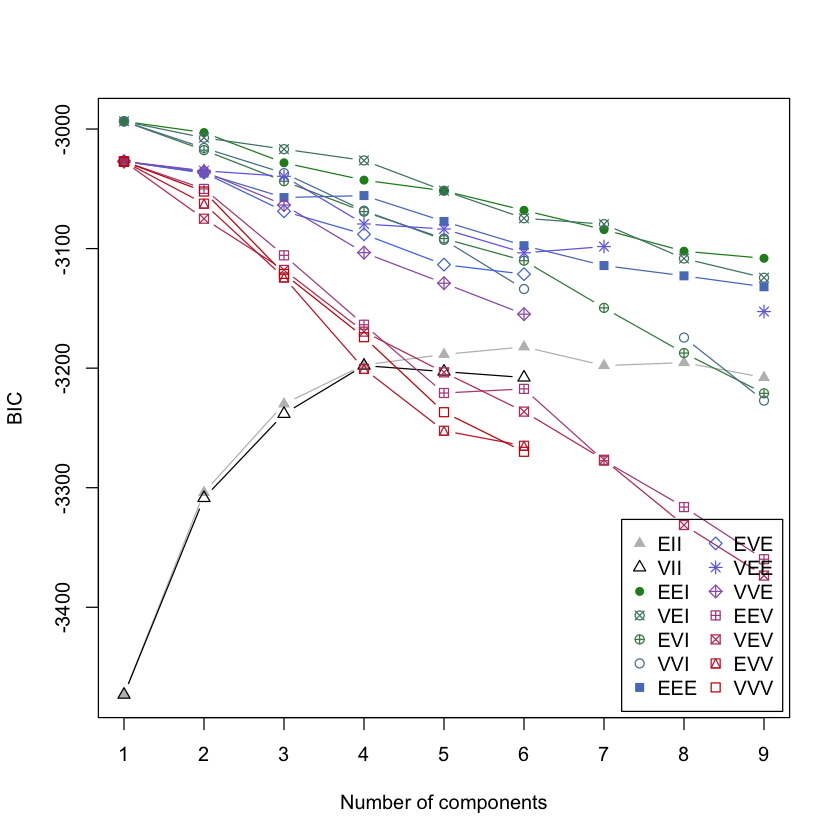

In [38]:
plot(mclustBIC(d)) # 10のクラスタリングアルゴリズムで、クラスター数がいくつなら最も数理的に妥当な結果となるかを算出

In [39]:
d.mc <- hc(modelName = "EEE", data = d)
d.mcl <- hclass(d.mc, 3)
head(d.mcl)
ClusterEM <- as.numeric(d.mcl)

3
1
1
1
1
1
2


### 5.3.4 3つの手法を比較する

In [44]:
d2 <- cbind(d, ClusterWard, ClusterKmeans, ClusterEM)
Ward.res <- with(d2, aggregate(d2[,1:5], list(ClusterWard = ClusterWard), mean))
Kmeans.res <- with(d2, aggregate(d2[,1:5], list(ClusterKmeans = ClusterKmeans), mean))
EM.res <- with(d2, aggregate(d2[,1:5], list(ClusterEM = ClusterEM), mean))

# 各手法、各クラスターの平均値を比較。どうもEMだけ異なるようだ
round(Ward.res[order(Ward.res$books),-1],1)
round(Kmeans.res[order(Kmeans.res$books),-1],1)
round(EM.res[order(EM.res$books),-1],1)

,books,cloths,cosmetics,foods,liquors
3,9.2,14.4,5.3,4.2,8.4
2,29,11.1,4.5,5.3,6.1
1,46.6,9.7,4.6,4.8,4.6


,books,cloths,cosmetics,foods,liquors
1,9,13.6,5.3,4.3,7.6
2,28.7,10.3,4.5,5,6
3,46.1,11.4,4.6,5.1,5.2


,books,cloths,cosmetics,foods,liquors
3,5.7,22.3,3,6,0.7
2,24.9,13.4,5,5.7,6
1,39.2,7.8,4.4,3.8,6.6


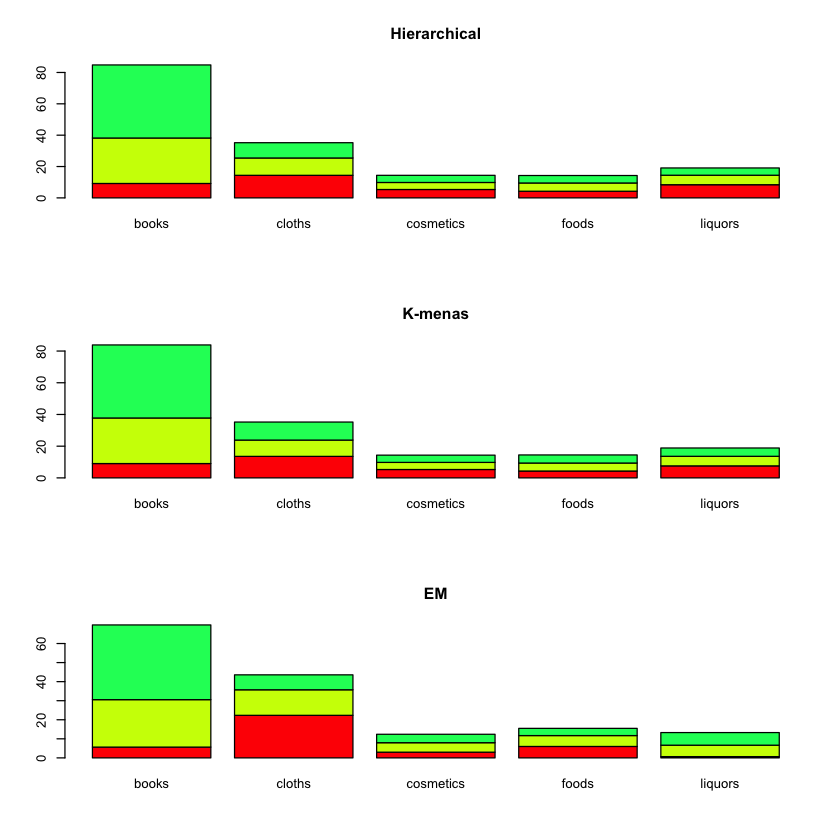

In [45]:
par(mfrow = c(3,1))
barplot(as.matrix(Ward.res[order(Ward.res$books),-1]), col = rainbow(5), main = "Hierarchical")
barplot(as.matrix(Kmeans.res[order(Kmeans.res$books),-1]), col = rainbow(5), main = "K-menas")
barplot(as.matrix(EM.res[order(EM.res$books),-1]), col = rainbow(5), main = "EM")

# 6. ロジスティック回帰

- ★保留

# 7. 決定木

> 試そうとしたが{mvpart}が使えない模様


```
> install.packages("mvpart")
--- Please select a CRAN mirror for use in this session ---
Warning message:
package ‘mvpart’ is not available (for R version 3.2.2)
```

# 8. SVM/ Random Forest

### 8.4.1 SVM

In [47]:
#R
library(e1071)
d.train <- read.table("data/ch8_train.txt", header = TRUE, sep = " ")
head(d.train)
d.test <- read.table("data/ch8_test.txt", header = TRUE, sep = " ")
head(d.test)

,age,sex,act1,act2,influx,label
1,28,M,Yes,Yes,C,No
2,34,M,Yes,Yes,A,Yes
3,33,M,No,Yes,A,No
4,40,M,No,No,A,Yes
5,30,F,Yes,Yes,A,No
6,31,M,No,Yes,C,No


,age,sex,act1,act2,influx
1,31,F,No,Yes,B
2,32,F,No,Yes,C
3,33,F,Yes,No,C
4,34,M,No,Yes,A
5,36,F,No,Yes,C
6,27,M,Yes,No,B


In [100]:
# Python
d_train = pd.read_csv("data/ch8_train.txt", delim_whitespace = True)
d_test = pd.read_csv("data/ch8_test.txt", delim_whitespace = True)
d_train.head()
#d_test.head()

,age,sex,act1,act2,influx,label
0,28,M,Yes,Yes,C,No
1,34,M,Yes,Yes,A,Yes
2,33,M,No,Yes,A,No
3,40,M,No,No,A,Yes
4,30,F,Yes,Yes,A,No


In [101]:
# R
d.svm <- svm(label ~ ., d.train)
print(d.svm)

AttributeError: 'DataFrame' object has no attribute 'svm'

In [103]:
# Python
clf = svm.SVC()
clf.fit(d_train, d_train['label'])

ValueError: could not convert string to float: 'No'

In [49]:
d.test.svm.pred <- predict(d.svm, newdata = d.test)
summary(d.test.svm.pred)

No Yes 
471  29

In [50]:
res <- tune.svm(label ~ ., data = d.train) # tune.svmでパラメータチューニングができる
res$best.model


Call:
best.svm(x = label ~ ., data = d.train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1428571 

Number of Support Vectors:  1502


### 8.4.2 Random Forest

In [51]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [52]:
d.rf <- randomForest(label ~ ., d.train)
print(d.rf)


Call:
 randomForest(formula = label ~ ., data = d.train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 6.2%
Confusion matrix:
      No Yes class.error
No  8821 179  0.01988889
Yes  441 559  0.44100000


In [53]:
d.test.rf.pred <- predict(d.rf, newdata = d.test)
summary(d.test.rf.pred)

No Yes 
472  28

mtry = 2  OOB error = 6.32% 
Searching left ...
mtry = 1 	OOB error = 7.8% 
-0.2341772 0.05 
Searching right ...
mtry = 4 	OOB error = 6.51% 
-0.03006329 0.05 



Call:
 randomForest(x = x, y = y, mtry = res[which.min(res[, 2]), 1]) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 6.28%
Confusion matrix:
      No Yes class.error
No  8821 179  0.01988889
Yes  449 551  0.44900000

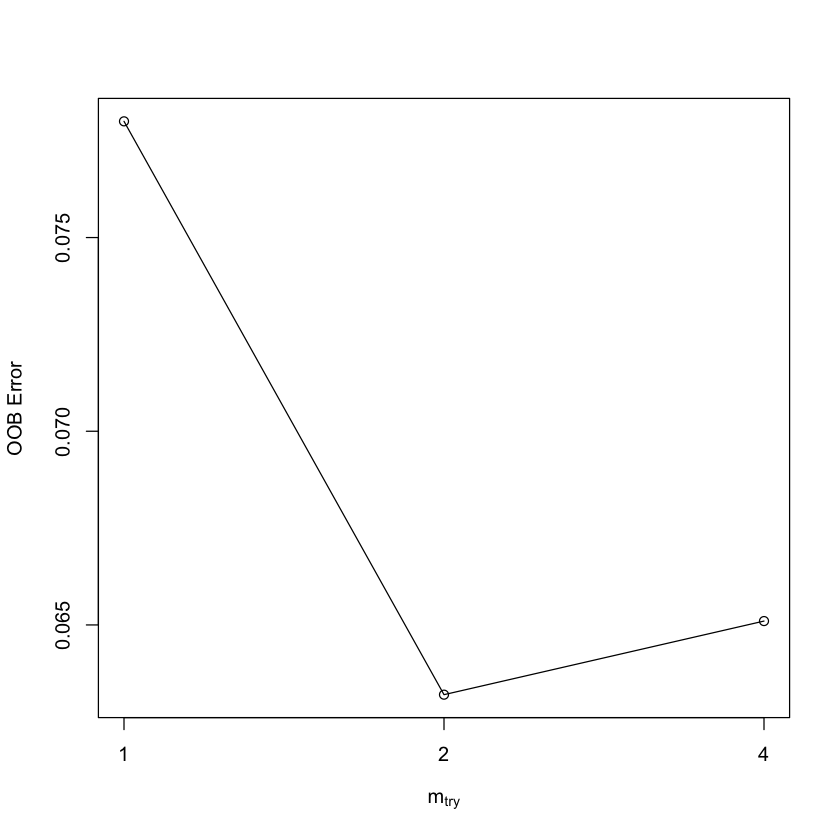

In [55]:
tuneRF(d.train[,-6], d.train[,6], doBest = T) # パラメータチューニング

In [57]:
importance(d.rf) # それぞれの説明変数の重要度を算出できる（回帰でなく分類器なのに）

,MeanDecreaseGini
age,139.7685
sex,43.24062
act1,435.4206
act2,103.5352
influx,108.1218


### 8.4.3 答え合わせ

In [61]:
table(d.test.label$label, d.test.svm.pred)
table(d.test.label$label, d.test.rf.pred)  # エラー確認要★

ERROR: Error in table(d.test.label$label, d.test.svm.pred): object 'd.test.label' not found


ERROR: Error in table(d.test.label$label, d.test.rf.pred): object 'd.test.label' not found


# 9. アソシエーション分析

## 9.1 「Xが起きればYも起きる」をモデリングする

- IBMの開発したApriori
    - Support
    - Confidence
    - Lift


In [1]:
library(arules)
d <- read.table("data/ch9_2.txt", header = TRUE, sep = " ")
d.mx <- as.matrix(d)
d.tran <- as(d.mx, "transactions")
summary(d.tran)

Loading required package: Matrix

Attaching package: ‘arules’

 以下のオブジェクトは ‘package:base’ からマスクされています: 

     %in%, abbreviate, write 



transactions as itemMatrix in sparse format with
 3000 rows (elements/itemsets/transactions) and
 11 columns (items) and a density of 0.5109091 

most frequent items:
      book       food stationery   imported        toy    (Other) 
      2937       2067       2033       1547       1502       6774 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11 
 13  73 258 481 622 601 512 288 123  27   2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    4.00    6.00    5.62    7.00   11.00 

includes extended item information - examples:
       labels
1        book
2   cosmetics
3 electronics

In [4]:
tmp.tran <- read.transactions(file='data/ch9_basket.txt', format = 'basket', sep = ',', rm.duplicates = T)
summary(tmp.tran)

transactions as itemMatrix in sparse format with
 4 rows (elements/itemsets/transactions) and
 10 columns (items) and a density of 0.45 

most frequent items:
     book cosmetics      food    liquor      sake   (Other) 
        3         2         2         2         2         7 

element (itemset/transaction) length distribution:
sizes
3 6 
2 2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0     3.0     4.5     4.5     6.0     6.0 

includes extended item information - examples:
     labels
1      book
2 cosmetics
3      food

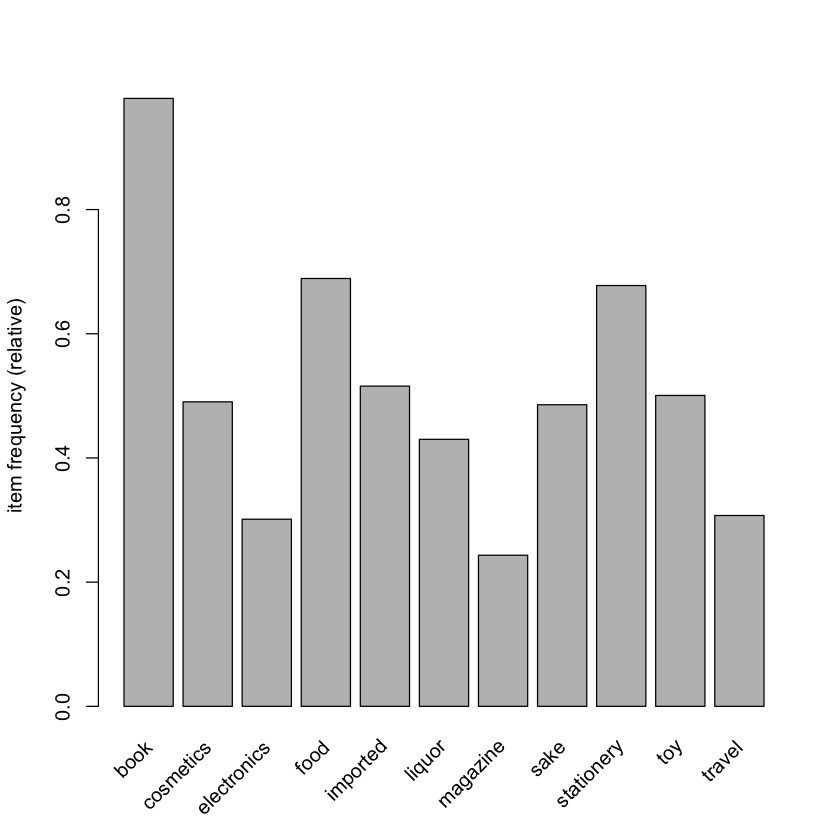

In [5]:
itemFrequencyPlot(d.tran)

In [6]:
d.ap <- apriori(d.tran)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.8    0.1    1 none FALSE            TRUE     0.1      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 300 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 3000 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [237 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [7]:
summary(d.ap)

set of 237 rules

rule length distribution (lhs + rhs):sizes
  1   2   3   4   5   6 
  1  13  67 102  48   6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   3.848   4.000   6.000 

summary of quality measures:
    support         confidence          lift       
 Min.   :0.1000   Min.   :0.8198   Min.   :0.9876  
 1st Qu.:0.1143   1st Qu.:0.9754   1st Qu.:1.0000  
 Median :0.1490   Median :0.9801   Median :1.0057  
 Mean   :0.1841   Mean   :0.9586   Mean   :1.4412  
 3rd Qu.:0.2117   3rd Qu.:0.9866   3rd Qu.:1.9799  
 Max.   :0.9790   Max.   :1.0000   Max.   :2.0394  

mining info:
   data ntransactions support confidence
 d.tran          3000     0.1        0.8

In [8]:
d_low.ap <- apriori(d.tran, parameter = list(support = 0.05))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.8    0.1    1 none FALSE            TRUE    0.05      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 3000 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 done [0.00s].
writing ... [566 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [9]:
d_high.ap <- apriori(d.tran, parameter = list(support = 0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.8    0.1    1 none FALSE            TRUE     0.2      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 600 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 3000 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [11]:
# Support, Confidence, Liftそれぞれでリストアップ
inspect(head(sort(d.ap, by = "support"), n = 10))
inspect(head(sort(d.ap, by = "confidence"), n = 10))
inspect(head(sort(d.ap, by = "lift"), n = 10))

# 他にも条件絞り込みサブセットあり割愛

   lhs                  rhs      support   confidence lift     
1  {}                => {book}   0.9790000 0.9790000  1.0000000
14 {food}            => {book}   0.6736667 0.9777455  0.9987186
13 {stationery}      => {book}   0.6623333 0.9773733  0.9983384
11 {imported}        => {book}   0.5046667 0.9786684  0.9996613
12 {toy}             => {book}   0.4913333 0.9813582  1.0024088
10 {cosmetics}       => {book}   0.4793333 0.9775663  0.9985355
9  {sake}            => {book}   0.4756667 0.9794097  1.0004185
81 {food,stationery} => {book}   0.4510000 0.9768953  0.9978502
6  {liquor}          => {toy}    0.4256667 0.9899225  1.9772087
7  {toy}             => {liquor} 0.4256667 0.8501997  1.9772087
    lhs                           rhs         support   confidence lift    
15  {liquor,magazine}          => {cosmetics} 0.1053333 1.0000000  2.039429
21  {imported,magazine}        => {cosmetics} 0.1236667 1.0000000  2.039429
22  {magazine,toy}             => {cosmetics} 0.1276667 1.0000000  2

### 9.2.2 得られた相関ルールをネットワークとして可視化する

In [12]:
library("arulesViz") # install.packagesでエラー
plot(d.ap, method = "graph", control = list(type = "items", layout = layout.fruchterman.reingold, cex = 2))

ERROR: Error in library("arulesViz"): there is no package called ‘arulesViz’


ERROR: Error in as.double(y): cannot coerce type 'S4' to vector of type 'double'


# 10. その他の分析手法

## 10.1 分散分析

- 窒素、カリウムがえんどう豆収穫量に影響を有意に及ぼすことが判明
- ただし、分散分析の前提として、実験条件が可能な限りランダムに割り振られていることが重視される
- コストの問題から実験回数を少なくすることが推奨される
- そのため**実験計画法**に基づく実験デザインが多い

In [15]:
data(npk) # えんどう豆の栽培データ。畑の場所と与えた肥料における窒素・リン・カリウムの組み合わせが収穫量に与える影響
head(npk)
summary(npk)
npk.aov <- aov(yield ~ block + N*P*K, npk)
summary(npk.aov)

,block,N,P,K,yield
1,1,0,1,1,49.5
2,1,1,1,0,62.8
3,1,0,0,0,46.8
4,1,1,0,1,57
5,2,1,0,0,59.8
6,2,1,1,1,58.5


 block N      P      K          yield      
 1:4   0:12   0:12   0:12   Min.   :44.20  
 2:4   1:12   1:12   1:12   1st Qu.:49.73  
 3:4                        Median :55.65  
 4:4                        Mean   :54.88  
 5:4                        3rd Qu.:58.62  
 6:4                        Max.   :69.50  

            Df Sum Sq Mean Sq F value  Pr(>F)   
block        5  343.3   68.66   4.447 0.01594 * 
N            1  189.3  189.28  12.259 0.00437 **
P            1    8.4    8.40   0.544 0.47490   
K            1   95.2   95.20   6.166 0.02880 * 
N:P          1   21.3   21.28   1.378 0.26317   
N:K          1   33.1   33.14   2.146 0.16865   
P:K          1    0.5    0.48   0.031 0.86275   
Residuals   12  185.3   15.44                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## 10.2 一般化線形モデルとその応用

- 一般化線形モデル(GLM)には、ロジスティック回帰以外にも様々な派生形がある
- ポアソン回帰モデルと、Cox比例ハザードモデルを紹介する

## 10.3 主成分分析、因子分析とその発展形

- モデルなしで、多くの変数を少ない変数に集約する主成分分析
    - 主に変数の集約、削除に使う
- モデルありで、多くの変数を共通因子にまとめるのが因子分析
    - クラスタリングと同様の発想で、まとめたいときに使う
- 多重共線性（説明変数同士に強い相関があり分析結果が歪む場合）の問題発生時に役立つ
    - 緩和するため説明変数を集約化する
    - どの様に集約化するかをPCAをはじめとしたメソッドで傾向把握することで行う

> [Pythonで主成分分析](http://breakbee.hatenablog.jp/entry/2014/07/13/191803)
> 不思議と?因子分析の記事はあまり見つからない


> [Using Python to perform factor and principal component analysis](http://www.dummies.com/how-to/content/data-science-using-python-to-perform-factor-and-pr.html)



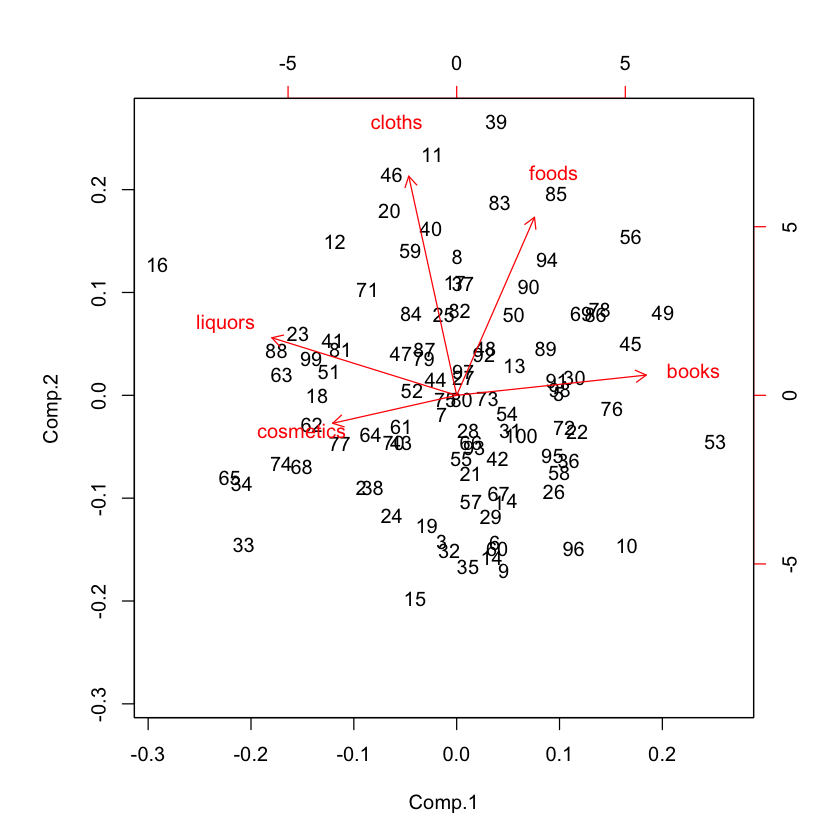

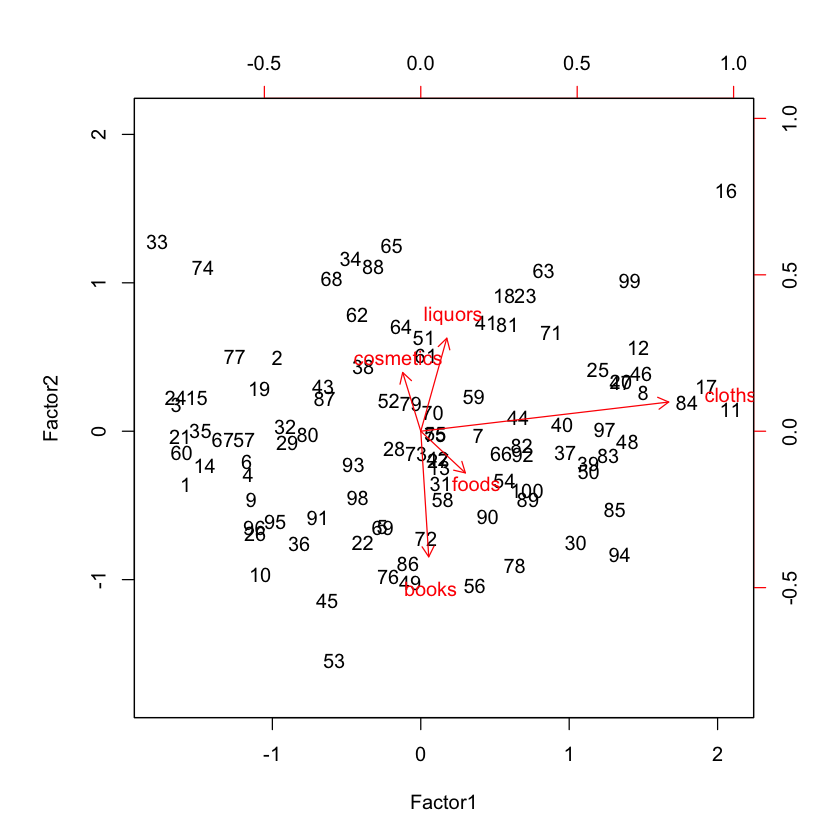

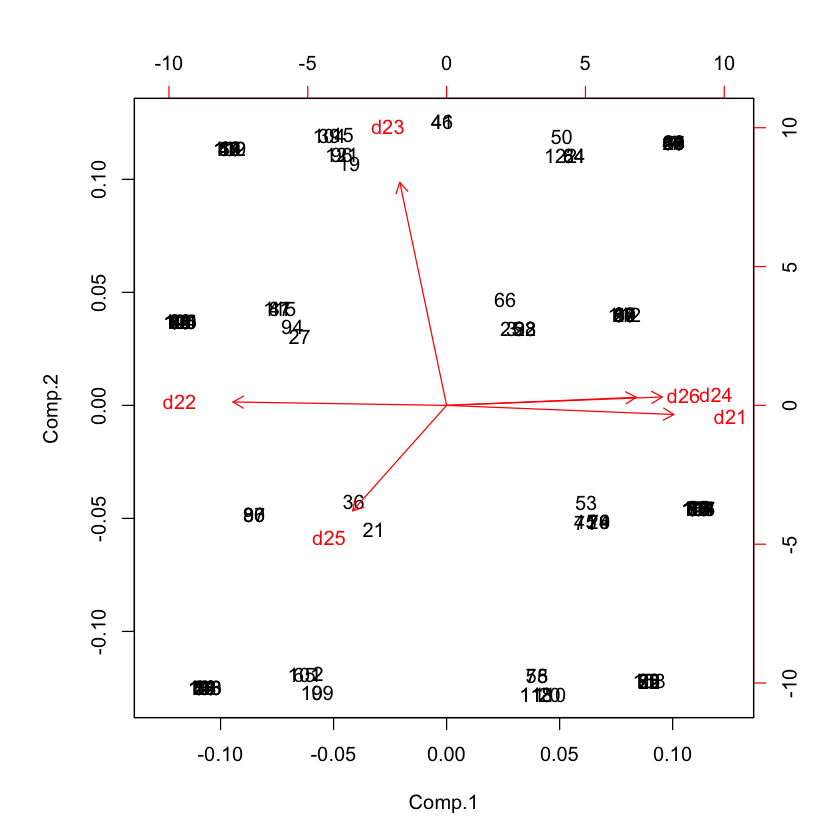

In [18]:
d5 <- read.table("data/ch5_3.txt", header = TRUE, sep = " ")
d6 <- read.table("data/ch6_4_2.txt", header = TRUE, sep = " ")
d5s <- scale(d5)
d6s <- scale(d6[,-7])
d5s.pc <- princomp(d5s) # 主成分分析 PCA princomp()
d5s.fc <- factanal(d5s, factors = 2, scores = "regression")
biplot(d5s.pc)
biplot(d5s.fc$scores, d5s.fc$loadings)
d6s.pc <- princomp(d6s)
biplot(d6s.pc)


## 10.4 機械学習のその他の手法と発展形

- NN, DNNなど
- 判別分析, conditional inference tree/forest, boosting/bagging

In [ ]:
>

## 10.5 グラフ理論・ネットワーク分析

- igraph不調のため割愛

## 10.6 計量時系列分析

- 時系列データは統計学的に特異な性質を持ち、通常アプローチでは扱いづらいため、計量経済学分野で独自の進歩
    - これまで金融データや市場データに主に適用
    - forecast ARIMAモデル（自己回帰和分移動平均）に代表される単変量に強い
    - vars 多変量時系列データ分析の代表パッケージ。 VAR Vector Auto-Regressive ベクトル自己回帰モデルを例に
    - MSwM マルコフ転換モデル Markov switching model 与えられた時系列が複数の自己解決モデルの混合からなると仮定し、どのタイミングでそれが入れ替わったのかEMアルゴリズムで推定する


> [時系列分析 I - ARMAモデルと時系列分析 - ITエンジニアのためのデータサイエンティスト養成講座(9)](http://www.atmarkit.co.jp/ait/articles/1406/30/news005.html)

|略称|説明|
|---|---|
|AR|Auto Regression 自己回帰モデル|
|MA|Moving Average 移動平均モデル|
|ARMA|自己回帰移動平均モデル|
|ARIMA|自己回帰和分移動平均モデル|
|ECT|誤差修正自己回帰モデル|
|ARCH|分散自己回帰モデル|
|GARCH|一般化分散自己回帰モデル|
|SV|Stochastic Volatility 確率的ボラティリティモデル|
|MSM|Markov Switching Model|
|MSM|Markov Switching Multifractal|



 ARIMA(2,1,2)(1,1,1)[4]                    : Inf
 ARIMA(0,1,0)(0,1,0)[4]                    : 1061.603
 ARIMA(1,1,0)(1,1,0)[4]                    : 1046.119
 ARIMA(0,1,1)(0,1,1)[4]                    : 993.4824
 ARIMA(0,1,1)(1,1,1)[4]                    : Inf
 ARIMA(0,1,1)(0,1,0)[4]                    : 991.3633
 ARIMA(1,1,1)(0,1,0)[4]                    : 993.9869
 ARIMA(0,1,2)(0,1,0)[4]                    : 991.8972
 ARIMA(1,1,2)(0,1,0)[4]                    : 994.2836
 ARIMA(0,1,1)(1,1,0)[4]                    : 996.8972

 Best model: ARIMA(0,1,1)(0,1,0)[4]                    



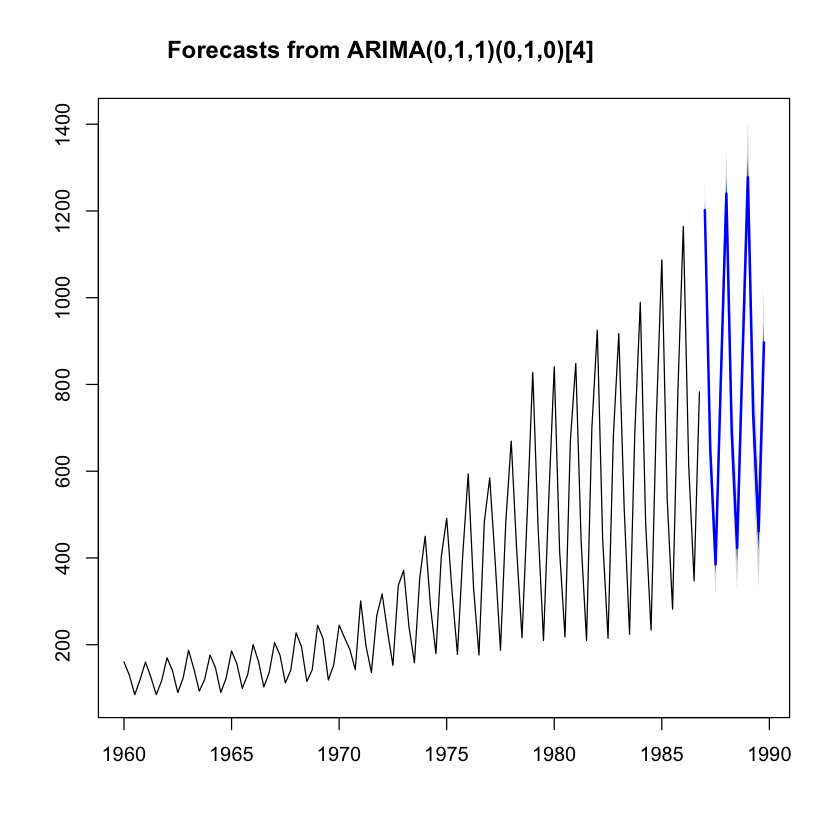

In [20]:
library(forecast) # 特にARIMAの様な単変量時系列データを扱う、計量時系列分析の様々な関数を持つ
data(UKgas) # 1960.1Q-1986.4Qの英国ガス消費量
UKgas.arima <- auto.arima(UKgas, trace = T, stepwise = T, seasonal = T)
plot(forecast(UKgas.arima, level = c(50,95), h = 12))

In [21]:
library(vars)
data(Canada) # 1980.1Q-2000.4Q カナダの労働生産性、雇用者数、失業率、実質賃金
VARselect(Canada, lag.max = 10, type = "trend")

Loading required package: MASS
Loading required package: strucchange
Loading required package: sandwich
Loading required package: urca
Loading required package: lmtest


,1,2,3,4,5,6,7,8,9,10
AIC(n),-6.142515,-6.693032,-6.835598,-6.660686,-6.544275,-6.510215,-6.379865,-6.386403,-6.265942,-6.384307
HQ(n),-5.894104,-6.245893,-6.189730,-5.816089,-5.500949,-5.268161,-4.939082,-4.746892,-4.427702,-4.347339
SC(n),-5.519795,-5.572136,-5.216525,-4.543437,-3.928849,-3.396613,-2.768087,-2.276450,-1.657812,-1.278001
FPE(n),0.002151284,0.001245533,0.001090776,0.001323745,0.001533496,0.001662024,0.002023890,0.002205185,0.002818662,0.002958593


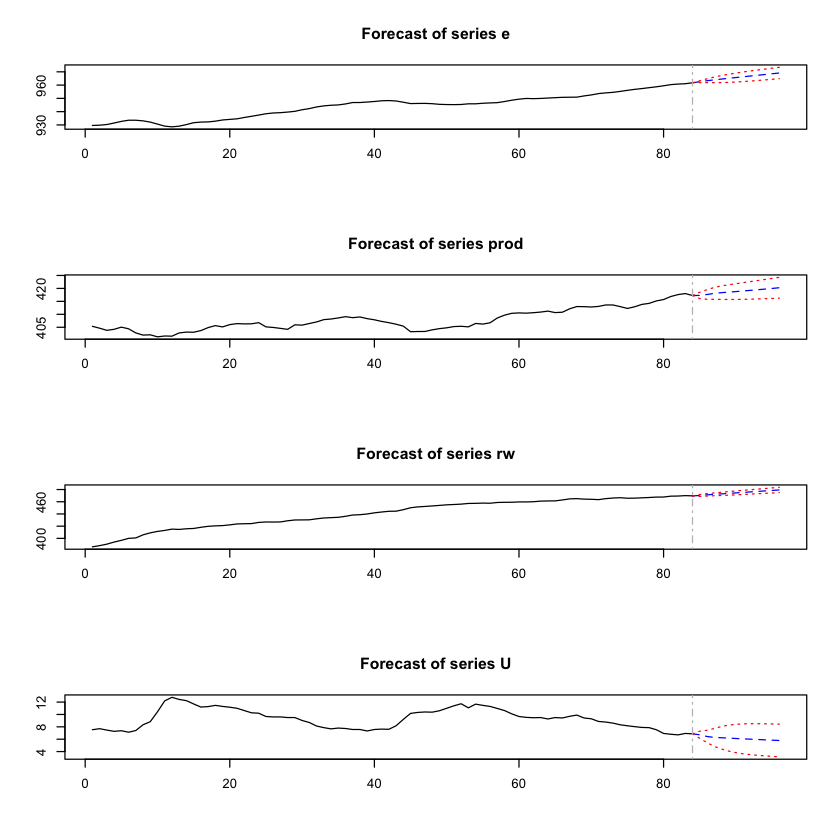

In [22]:
Canada.var <- VAR(Canada, p = 3, type = "trend")
Canada.var.prd <- predict(Canada.var, n.ahead = 12, ci = 0.95)
plot(Canada.var.prd)

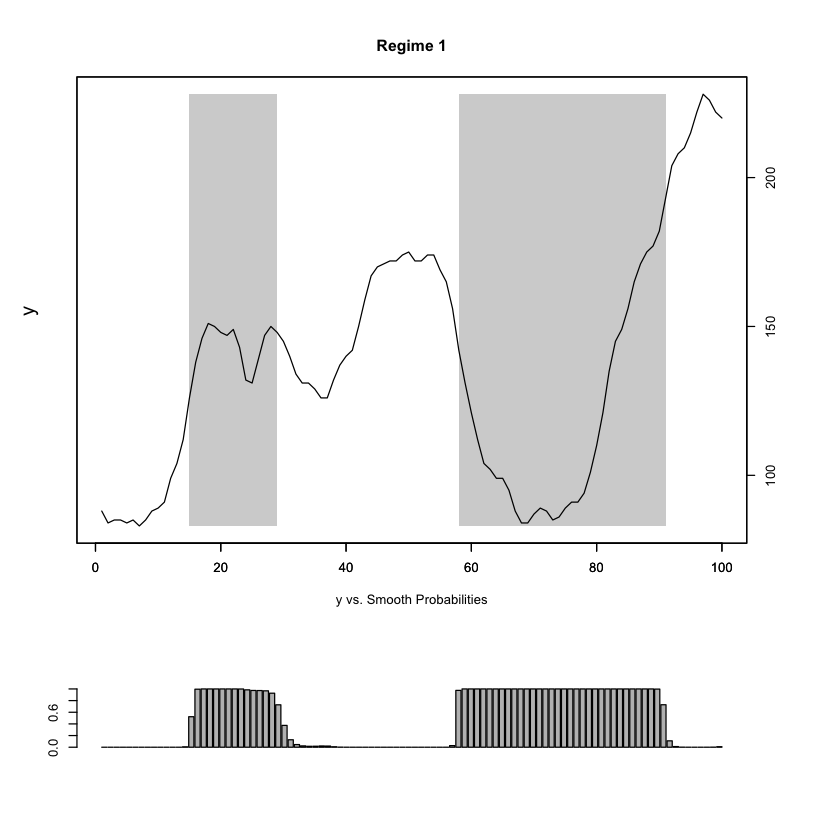

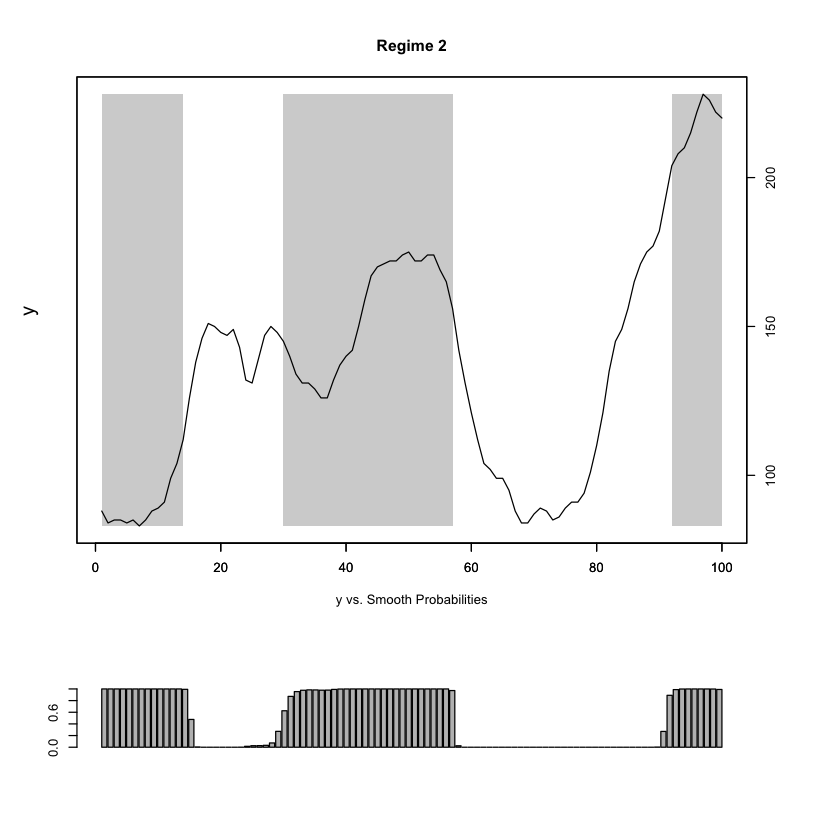

In [25]:
library(MSwM)
data(WWWusage)
y <- as.numeric(WWWusage)
t1 <- seq(from = 0, to = 0.5 * pi, length.out = 100)
t2 <- seq(from = 0, to = pi, length.out = 100)
x1 <- sin(t1)
x2 <- sin(t2)
model1 <- lm(y ~ x1 + x2)
msmModel1 <- msmFit(model1, k = 2, sw = rep(T,4))
plotProb(msmModel1, 2)
plotProb(msmModel1, 3)




## 10.7 ベイジアンモデリング

### 

## 10.8 その他の新旧メソッド

- 状態空間モデル
    - 時系列モデルと線形モデルを統合する枠組みとしてよく使われる
    - 入ってくるデータに合わせてモデルを更新できる
    - 時系列分析よりフレキシブル
- HMM 隠れマルコフモデル
    - 系列データ(天気の様に状態の並びが続くデータ)を分析・予測するためのメソッド
- SEM 共分散構造分析
    - 回帰分析をさらに拡張し、変数間の因果関係をダイアグラムとして表現、全体の構造を分析
- NLP 自然言語処理
    - RMeCabなど
